In [1]:
#1. Import Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#2. Load dataset

sms = pd.read_csv('sms_spam_collection.csv')
sms.head()

,Unnamed: 0,label,message
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
#mengecek jumlah per label

sms['label'].value_counts(normalize = True)
#hasil tidak balance

ham     0.865937
spam    0.134063
Name: label, dtype: float64

### __TEXT PREPROCESSING (1)__

Method :
1. converting to lower case
1. contraction
1. remove or convert number into text
1. remove punctuation
1. remove white spaces
1. remove stopwords and particular words

> __1. Converting to lower case__

In [4]:
#1.Function Convert to lower case

def to_lower(text):
    return text.lower()

In [5]:
#mencoba function convert to lower case
text_1 = 'Summer Desember 10th 2019'
to_lower(text_1)

'summer desember 10th 2019'

> __2. Contraction__

In [6]:
#1. Menyiapkan function untuk contraction

import re

contractions_dict = {     
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "iit will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def main_contraction(text):
    text = expand_contractions(text, contractions_dict)
    return text

In [7]:
#mencoba function contraction

text_2 = "if I ain't got you"
main_contraction(text_2)

'if I am not got you'

> __3. Remove or convert number into text__

In [8]:
#1. Menyiapkan function untuk remove number

def remove_number(text):
    output = ''.join(c for c in text if not c.isdigit())
    return output

In [9]:
#mencoba function remove number

text_3 = 'I was born in 1991'
remove_number(text_3)

'I was born in '

> __4. Remove punctuation__

In [10]:
from string import punctuation

In [11]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
#1. Menyiapkan function untuk remove punctuation

def remove_punctuation(text):
    return ''.join(c for c in text if c not in punctuation)

In [13]:
#mencoba function remove punctuation

text_4 = 'There was Bobby, Alex, Fergie and I'
remove_punctuation(text_4)

'There was Bobby Alex Fergie and I'

> __5. Remove white space__

In [14]:
#1. Menyiapkan function untuk remove strip

def to_strip(text):
    return " ".join(text.split())

In [15]:
#mencoba function remove white space

text_5 = "There   was Bobby,   Alex, Fergie and I    "
to_strip(text_5)

'There was Bobby, Alex, Fergie and I'

> __6. Remove Stopwords__

In [16]:
import nltk
from nltk.corpus import stopwords

In [17]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
print(stopwords. words('english')) #indonesian kalo indonesia

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [19]:
#1. Menyiapkan function untuk remove stopwords

def remove_stopwords(sentence):
    stop_words = stopwords.words('english')
    return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in stop_words])

In [20]:
text_6 = 'There was Bobby, Alex, Fergie and I'
remove_stopwords(text_6)

'There Bobby , Alex , Fergie I'

> __7. COMBINE ALL FUNCTION__

In [21]:
#membuat def text preprocessing

def text_preprocessing(sentence):
    prep1 = to_lower(sentence)
    prep2 = main_contraction(prep1)
    prep3 = remove_number(prep2)
    prep4 = remove_punctuation(prep3)
    prep5 = to_strip(prep4)
    prep6 = remove_stopwords(prep5)
    
    return prep6

In [22]:
text_7 = 'There was bobby, ales, fergie and I'
text_preprocessing(text_7)

'bobby ales fergie'

In [23]:
#Mengecek dataset baris pertama

sms.head(1)

,Unnamed: 0,label,message
0,0,ham,"Go until jurong point, crazy.. Available only ..."


In [24]:
#meleakukan text preprocessing dan dimasukkan ke dalam kolom clean

sms['message_clean'] = sms['message'].apply(text_preprocessing)
sms[['message', 'message_clean']]

,message,message_clean
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,nd time tried contact u u £ pound prize claim ...
5568,Will ü b going to esplanade fr home?,ü b going esplanade fr home
5569,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestions
5570,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


### __TEXT PREPROCESSING (2)__

> ## Stemming
The process of transforming to the root word.
For example you have caring, cares, cared, caringly carefully then you want to consider them as the same words “care”.
We need stemming because treating them as the same words will reduce overfitting.

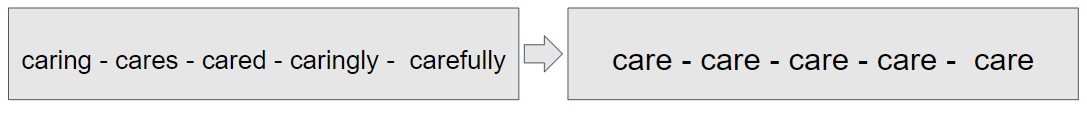

In [25]:
#1. import library

from nltk.stem import SnowballStemmer
from tqdm import tqdm

In [26]:
#2. membuat function stem

snowball_stemmer = SnowballStemmer('english')

def stem(text):
    stemmed_word = [snowball_stemmer.stem(word) for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    return " ".join(stemmed_word)


# def stem(text):
#     stemmed_word = [snowball_stemmer.stem(word) for sent in tqdm(nltk.sent_tokenize(text)) for word in tqdm(nltk.word_tokenize(sent))]
#     return " ".join(stemmed_word)

In [27]:
#mencoba function stem diatas

text_8 = "I am reading a book and the book is very fascinating"
print(stem(text_8))

i am read a book and the book is veri fascin


In [28]:
#mencoba function stem diatas (2)

stem('carefully')

'care'

- fascin: Hasil stem kadang tidak bisa dipahami manusia dan tidak ada di kamus

> ## Lemmatization
The process of transforming to the dictionary base form.
caring, cares, cared, caringly carefully will be transformed into care, care, care caringly carefully.
caringly and carefully are listed in the dictionary.
purpose of lemmatization is also to reduce overfitting.

In [29]:
#1. Import library

from nltk.stem import WordNetLemmatizer

In [30]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
#2. membuat function stem lemmatize

wordnet_lemma = WordNetLemmatizer()

def lemmatize(text):
    lemma_word = [wordnet_lemma.lemmatize(word) for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    return " ".join(lemma_word)

In [32]:
#mencoba function stem diatas

lemmatize(text_8)

'I am reading a book and the book is very fascinating'

In [33]:
#mencoba function stem diatas (2)

lemmatize('there she goes. Here I am')

'there she go . Here I am'

> __STEM & LEMMA__

In [34]:
#1. melakukan lemma dan stem pada dataset

sms['message_stem'] = sms['message_clean'].apply(stem)
sms['message_lemma'] = sms['message_clean'].apply(lemmatize)

sms[['message_stem', 'message_lemma']]

,message_stem,message_lemma
0,go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...
1,ok lar joke wif u oni,ok lar joking wif u oni
2,free entri wkli comp win fa cup final tkts st ...,free entry wkly comp win fa cup final tkts st ...
3,u dun say earli hor u c alreadi say,u dun say early hor u c already say
4,nah think goe usf live around though,nah think go usf life around though
...,...,...
5567,nd time tri contact u u £ pound prize claim ea...,nd time tried contact u u £ pound prize claim ...
5568,ü b go esplanad fr home,ü b going esplanade fr home
5569,piti mood soani suggest,pity mood soany suggestion
5570,guy bitch act like interest buy someth els nex...,guy bitching acted like interested buying some...


## __TEXT EXPLORATION__

> __WORD FREQ__

In [35]:
import seaborn as sns

In [36]:
#1. Membuat value count dengan function

def kamus(check):
    check = check.str.extractall('([a-zA_Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()

    kamus = {'kata':check.index,'freq':check.values}
    kamus = pd.DataFrame(kamus)
    kamus.index = kamus['kata']
    kamus.drop('kata', axis = 1, inplace = True)
    kamus.sort_values('freq',ascending=False,inplace=True)
    
    return kamus

In [37]:
sms

,Unnamed: 0,label,message,message_clean,message_stem,message_lemma
0,0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...
1,1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joke wif u oni,ok lar joking wif u oni
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,free entri wkli comp win fa cup final tkts st ...,free entry wkly comp win fa cup final tkts st ...
3,3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,u dun say earli hor u c alreadi say,u dun say early hor u c already say
4,4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though,nah think goe usf live around though,nah think go usf life around though
...,...,...,...,...,...,...
5567,5567,spam,This is the 2nd time we have tried 2 contact u...,nd time tried contact u u £ pound prize claim ...,nd time tri contact u u £ pound prize claim ea...,nd time tried contact u u £ pound prize claim ...
5568,5568,ham,Will ü b going to esplanade fr home?,ü b going esplanade fr home,ü b go esplanad fr home,ü b going esplanade fr home
5569,5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestions,piti mood soani suggest,pity mood soany suggestion
5570,5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...,guy bitch act like interest buy someth els nex...,guy bitching acted like interested buying some...


In [38]:
#2. mengaplikasikan function diatas untuk kata yg telah di lemma

kamus_clean = kamus(sms[sms['label']=='spam']['message_lemma'])

<AxesSubplot:ylabel='kata'>

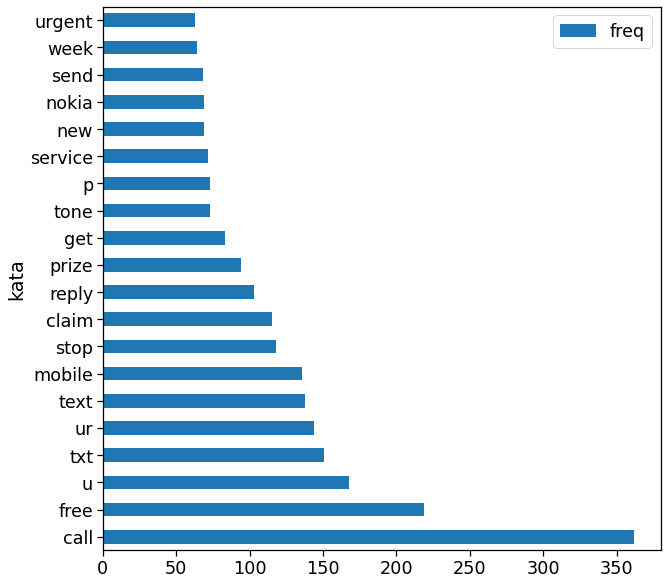

In [39]:
#3. Membuat plot word frequensi

sns.set_context(context = 'notebook', font_scale=1.6)
kamus_clean[:20].plot(kind='barh', figsize=(10,10))

> __HAM__

In [40]:
#melihat yg sms ham

kamus_ham = kamus(sms[sms['label']== 'ham']['message_lemma'])

<AxesSubplot:ylabel='kata'>

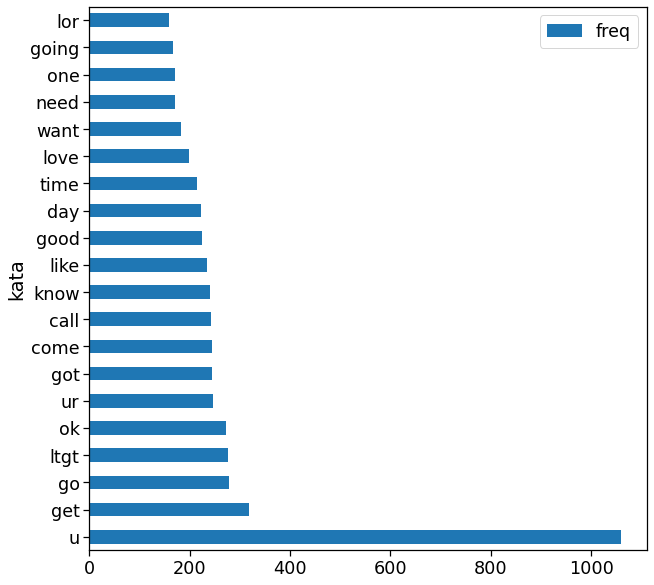

In [41]:
#memvisualisasikan 

sns.set_context(context = 'notebook', font_scale=1.6)
kamus_ham[:20].plot(kind='barh', figsize=(10,10))

__SPAM__

In [42]:
#melihat yg sms spam

kamus_spam = kamus(sms[sms['label']== 'spam']['message_lemma'])

<AxesSubplot:ylabel='kata'>

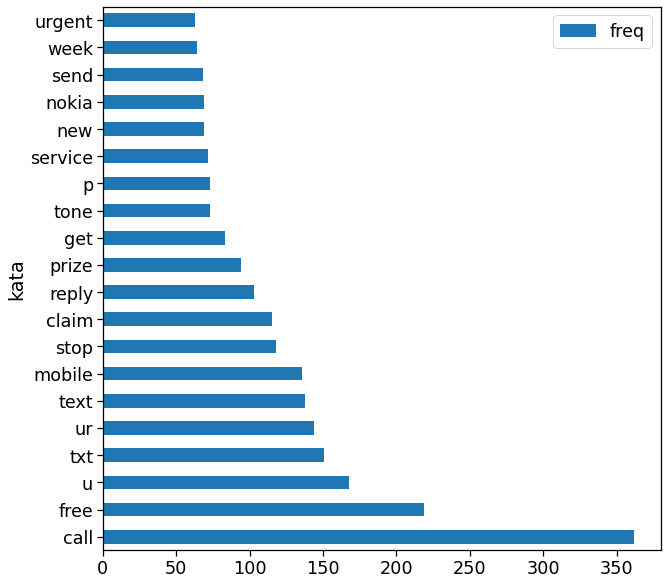

In [43]:
#memvisualisasikan 

sns.set_context(context = 'notebook', font_scale=1.6)
kamus_spam[:20].plot(kind='barh', figsize=(10,10))

> __WORD CLOUD__

#install

!pip install wordcloud

In [44]:
#1. Import library

from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [45]:
#2, Membuat function plot cloud

def plot_cloud(wordcloud):
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud)
    plt.axis('off')

__SEMUA SMS__

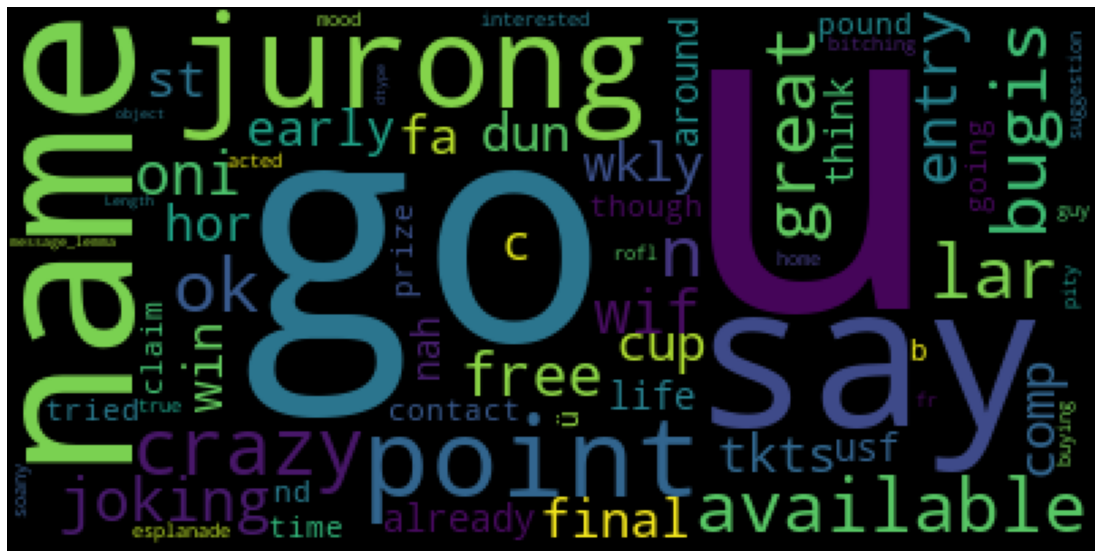

In [46]:
word_cloud = WordCloud().generate(str(sms['message_lemma']))
plot_cloud(word_cloud)

__SPAM__

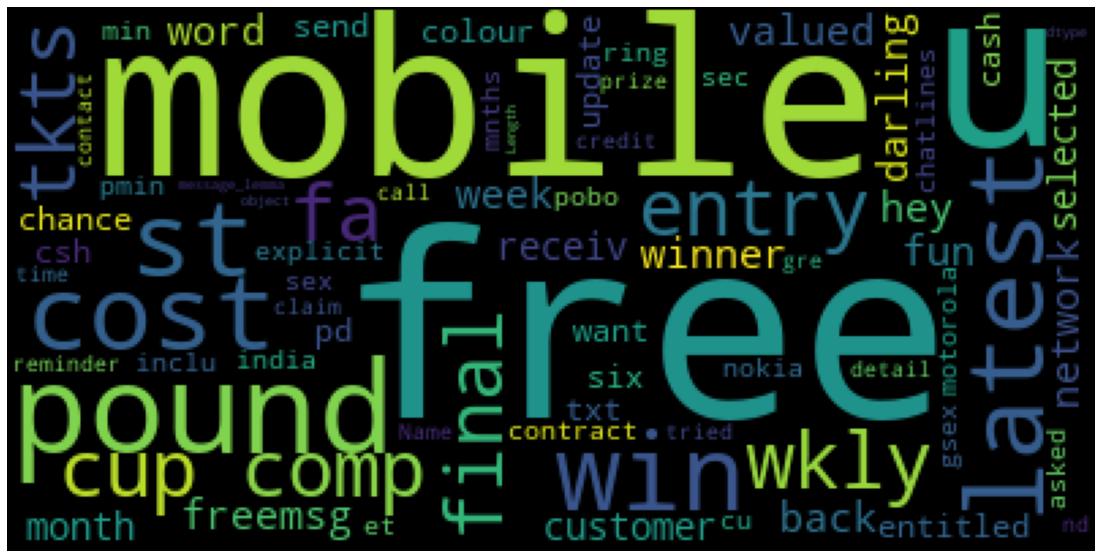

In [47]:
word_cloud_spam = WordCloud().generate(str(sms[sms['label']=='spam']['message_lemma']))
plot_cloud(word_cloud_spam)

__HAM__

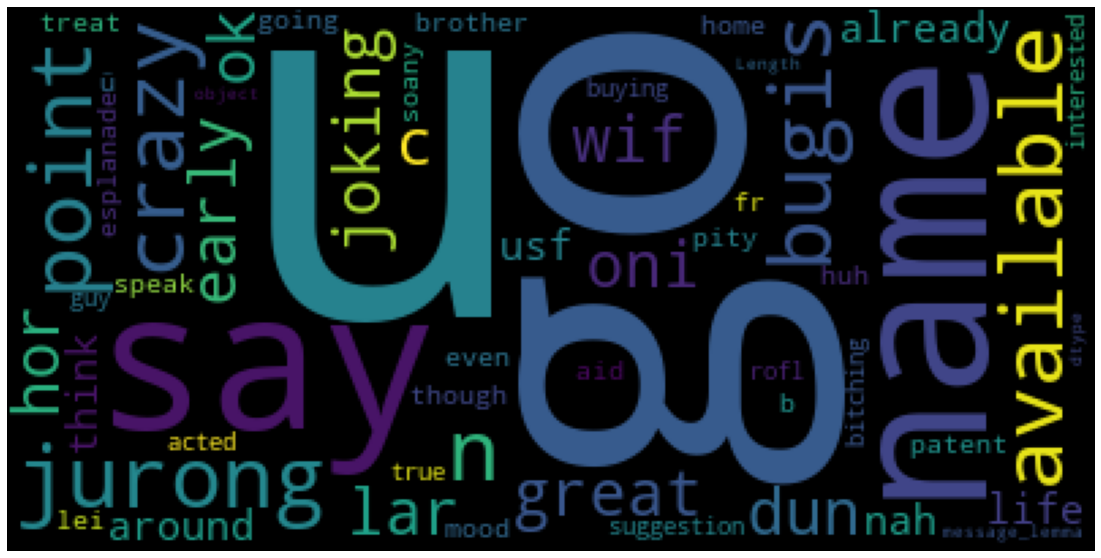

In [48]:
word_cloud_ham = WordCloud().generate(str(sms[sms['label']=='ham']['message_lemma']))
plot_cloud(word_cloud_ham)

> __LENGTH OF SENTENCE__

In [49]:
#1. Mengetahui panjang message

sms['length'] = sms['message'].apply(len)

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


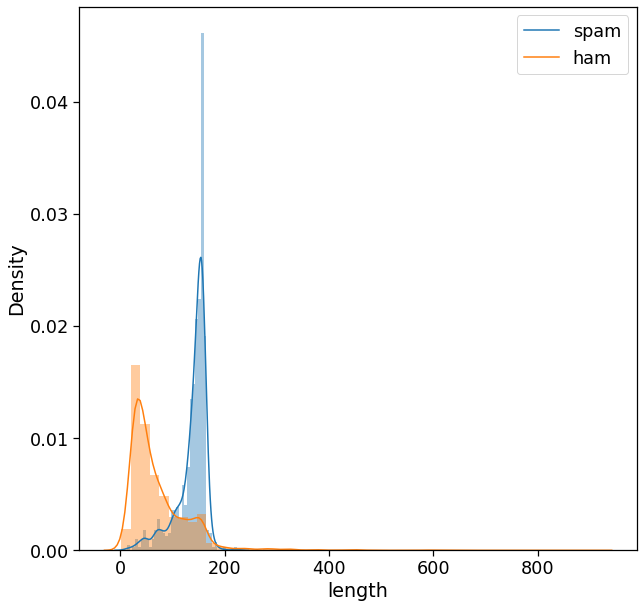

In [50]:
#2. Membuat distribution plot

plt.figure(figsize = (10,10))
sms_spam = sms[sms['label']=='spam']
sms_ham = sms[sms['label']=='ham']

sns.distplot(sms_spam['length'])
sns.distplot(sms_ham['length'])

plt.legend(['spam', 'ham'])

plt.show()

In [51]:
#melihat ham paling tinggi

sms_ham[sms_ham['length'] == sms_ham['length'].max()]['message']

1085    For me the love should start with attraction.i...
Name: message, dtype: object

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


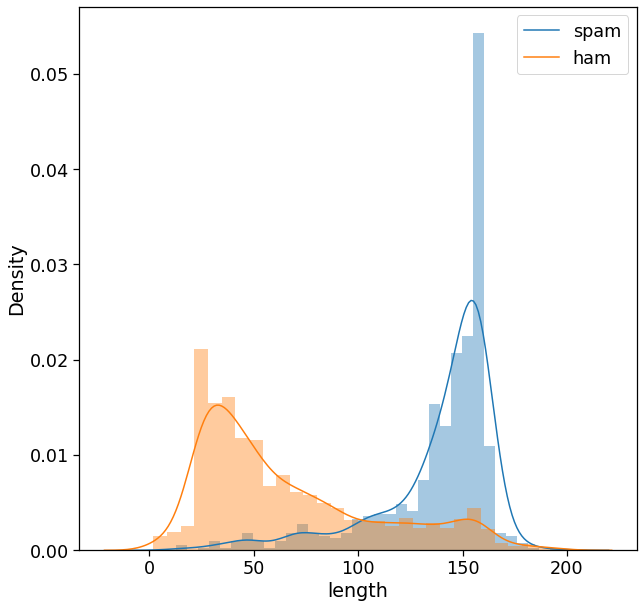

In [52]:
#membuat plot yg dengan length dibawah 200

plt.figure(figsize = (10,10))

sms2 = sms[sms['length'] < 200] 
sms2_spam = sms2[sms2['label'] == 'spam']
sms2_ham = sms2[sms2['label'] == 'ham']

sns.distplot(sms2_spam['length'])
sns.distplot(sms2_ham['length'])

plt.legend(['spam','ham'])

plt.show()

## __Document Term Matrix__

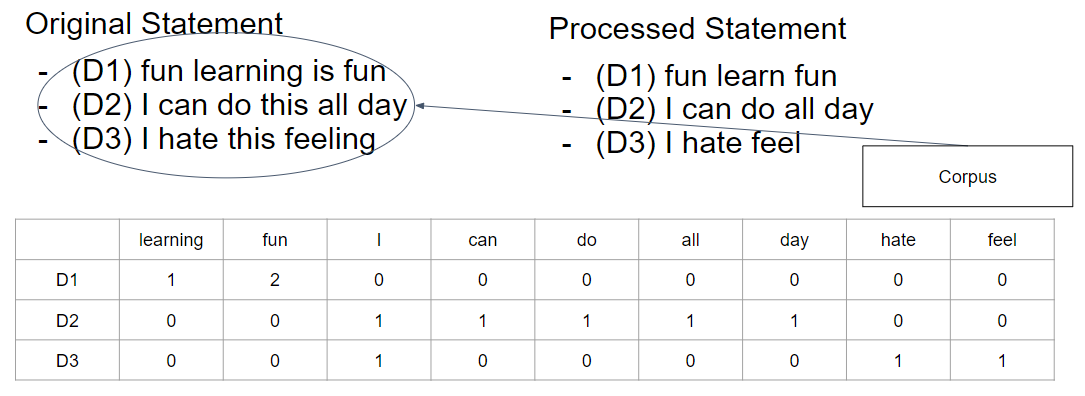

In [53]:
#contoh kalimat

words_example = ["You already know me, don't you?",
                "I am the best there is"]

In [54]:
#1. Import library

from sklearn.feature_extraction.text import CountVectorizer

In [55]:
#2. Melakukan count vectorizer

vect = CountVectorizer(preprocessor = remove_punctuation)
vect.fit(words_example)

CountVectorizer(preprocessor=<function remove_punctuation at 0x00000176142960D0>)

In [56]:
print('Vocab size:{}'.format(len(vect.vocabulary_)))
print('Vocab content:{}'.format(vect.vocabulary_))

Vocab size:11
Vocab content:{'You': 0, 'already': 1, 'know': 6, 'me': 7, 'dont': 4, 'you': 10, 'am': 2, 'the': 8, 'best': 3, 'there': 9, 'is': 5}


In [57]:
#3. Melakukan dtm

dtm = vect.transform(words_example)
dtm.toarray()

array([[1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1],
       [0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0]], dtype=int64)

In [58]:
#4. Mendapatkan nama kolom untuk di df

vect.get_feature_names()

['You',
 'already',
 'am',
 'best',
 'dont',
 'is',
 'know',
 'me',
 'the',
 'there',
 'you']

In [59]:
#5. Membuat jadi dataframe

dtm = pd.DataFrame(dtm.toarray(), columns = vect.get_feature_names())
dtm['text'] = words_example
dtm

,You,already,am,best,dont,is,know,me,the,there,you,text
0,1,1,0,0,1,0,1,1,0,0,1,"You already know me, don't you?"
1,0,0,1,1,0,1,0,0,1,1,0,I am the best there is


> __N-Grams__

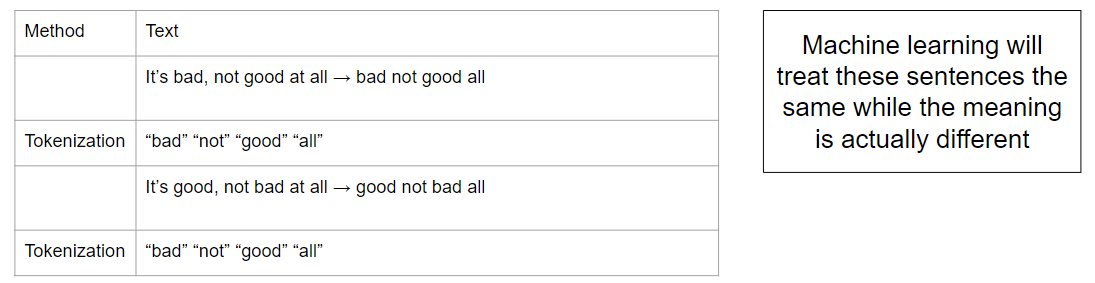

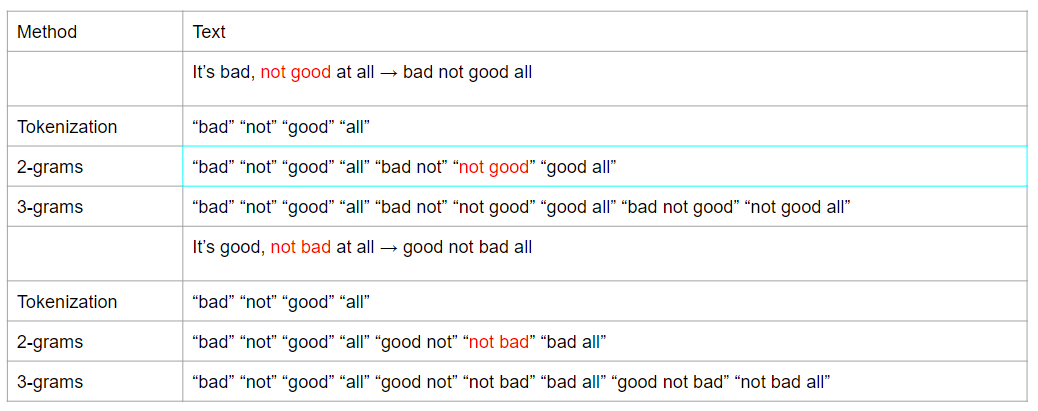

In [61]:
words_example

["You already know me, don't you?", 'I am the best there is']

In [64]:
#1. Melakukan n-grams

from sklearn.feature_extraction.text import CountVectorizer

                                        #unigram, bigrams
vect2 = CountVectorizer(ngram_range = (1,2))
vect2.fit(words_example)

CountVectorizer(ngram_range=(1, 2))

In [65]:
#2. Mengecek jumlah vocab dan menampilkan vocab content

print("Vocabulary size:", len(vect2.vocabulary_))
print("Vocabulary content: \n", vect2.vocabulary_) #ada yg satu kata, ada yg dua kata mengikuti ngram range

Vocabulary size: 19
Vocabulary content: 
 {'you': 17, 'already': 0, 'know': 9, 'me': 11, 'don': 6, 'you already': 18, 'already know': 1, 'know me': 10, 'me don': 12, 'don you': 7, 'am': 2, 'the': 13, 'best': 4, 'there': 15, 'is': 8, 'am the': 3, 'the best': 14, 'best there': 5, 'there is': 16}


In [66]:
#3. Mengecek dtm dalam array

dtm = vect2.transform(words_example)
dtm.toarray()

array([[1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1],
       [0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0]],
      dtype=int64)

In [70]:
# Mendapatkan feature name

vect2.get_feature_names()

['already',
 'already know',
 'am',
 'am the',
 'best',
 'best there',
 'don',
 'don you',
 'is',
 'know',
 'know me',
 'me',
 'me don',
 'the',
 'the best',
 'there',
 'there is',
 'you',
 'you already']

In [68]:
#4. Membuat datafram 

dtm = pd.DataFrame(dtm.toarray(), columns = vect2.get_feature_names())
dtm

,already,already know,am,am the,best,best there,don,don you,is,know,know me,me,me don,the,the best,there,there is,you,you already
0,1,1,0,0,0,0,1,1,0,1,1,1,1,0,0,0,0,2,1
1,0,0,1,1,1,1,0,0,1,0,0,0,0,1,1,1,1,0,0


In [69]:
#5. Menambah kolom message yg berisi word example tadi

dtm['message'] = words_example
dtm

,already,already know,am,am the,best,best there,don,don you,is,know,know me,me,me don,the,the best,there,there is,you,you already,message
0,1,1,0,0,0,0,1,1,0,1,1,1,1,0,0,0,0,2,1,"You already know me, don't you?"
1,0,0,1,1,1,1,0,0,1,0,0,0,0,1,1,1,1,0,0,I am the best there is


> __TF-IDF__

rescale features by how informative we expect them to be.
give high weight to any term appear often in particular document, not in many documents.
tfidf(word, doc) = tf(word) log((N+1)/(Nw+1)) + 1, with 
- tf(word, doc) : term freq of certain word of document
- Nw : number of doc where the words appear
- N : number of doc in training set


TF-IDF Calculation
<br>
tfidf(word, doc) = tf(word,doc) log((N+1)/(Nw+1)) + 1, with
- tfidf for word learning and document D1
- N = 3, Nw = 1, tf(learning,D1) = 1
- tfidf(learning, D1) =  1 log(4/2) + 1 = 1.693	


Original Statement
- (D1) fun learning is fun
- (D2) I can do this all day
- (D3) I hate this feeling


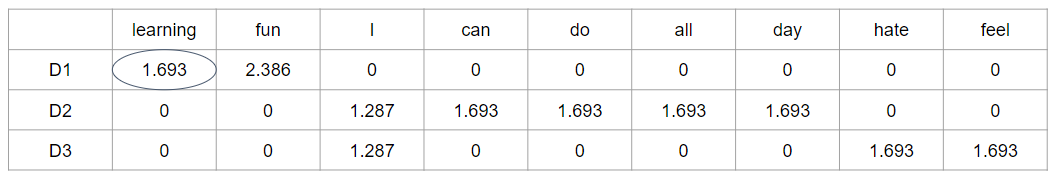

In [73]:
#1. Melakukan tf-idf pada word example

from sklearn.feature_extraction.text import TfidfVectorizer

vect3 = TfidfVectorizer()
vect3.fit(words_example)

TfidfVectorizer()

In [74]:
#2. Mengecek jumlah vocab dan menampilkan vocab content hasil tf-idf

print("Vocabulary size:", len(vect3.vocabulary_))
print("Vocabulary content: \n", vect3.vocabulary_) 

Vocabulary size: 10
Vocabulary content: 
 {'you': 9, 'already': 0, 'know': 5, 'me': 6, 'don': 3, 'am': 1, 'the': 7, 'best': 2, 'there': 8, 'is': 4}


In [75]:
#3. Mentransform

dtm_tf_idf = vect3.transform(words_example)
dtm_tf_idf.toarray()

array([[0.35355339, 0.        , 0.        , 0.35355339, 0.        ,
        0.35355339, 0.35355339, 0.        , 0.        , 0.70710678],
       [0.        , 0.4472136 , 0.4472136 , 0.        , 0.4472136 ,
        0.        , 0.        , 0.4472136 , 0.4472136 , 0.        ]])

In [76]:
#4. Menampilkan feature name hasil tf-idf

vect3.get_feature_names()

['already', 'am', 'best', 'don', 'is', 'know', 'me', 'the', 'there', 'you']

In [78]:
#5. Dijadikan dataframe

dtm_tf_idf = pd.DataFrame(dtm_tf_idf.toarray(), columns = vect3.get_feature_names())
dtm_tf_idf

,already,am,best,don,is,know,me,the,there,you
0,0.353553,0.000000,0.000000,0.353553,0.000000,0.353553,0.353553,0.000000,0.000000,0.707107
1,0.000000,0.447214,0.447214,0.000000,0.447214,0.000000,0.000000,0.447214,0.447214,0.000000


## __SPAM DETECTOR CASES__

In [79]:
#1. Menyiapkan data

text = sms['message_lemma']
y = np.where(sms['label'] == 'spam', 1, 0)

__DATA SPLITTING__

In [80]:
#2. Data splitting

from sklearn.model_selection import train_test_split

text_train, text_test, y_train, y_test = train_test_split(text, y)

__FIT AND TRANSFORM__

In [88]:
#3. Fit and transform method

vect4 = CountVectorizer().fit(text_train)
X_train = vect4.transform(text_train)
X_test = vect4.transform(text_test)

display("X_train:", X_train)
display("X_test:", X_test)

'X_train:'

<4179x11 sparse matrix of type '<class 'numpy.int64'>'
	with 407 stored elements in Compressed Sparse Row format>

'X_test:'

<1393x11 sparse matrix of type '<class 'numpy.int64'>'
	with 118 stored elements in Compressed Sparse Row format>

__TEXT CLASSIFICATION__

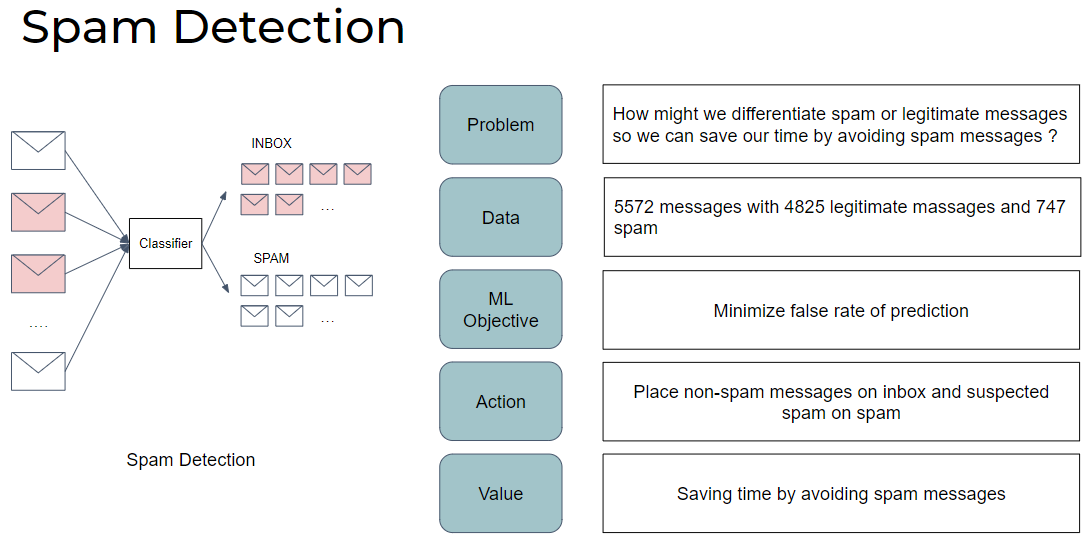

You can use some algo you already learned
- Logistic Regression
- RF
- Boosting, etc

<br>

There are another method such as
- Naive Bayes
- Support Vector Classifier (SVC)
- Deep Learning


> __LINEAR REGRESSION__

In [104]:
#1. Melakukan model 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [93]:
#2. Melakukan prediksi

y_pred = model.predict(X_test)

In [94]:
#3. Membuat classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1205
           1       0.00      0.00      0.00       188

    accuracy                           0.87      1393
   macro avg       0.43      0.50      0.46      1393
weighted avg       0.75      0.87      0.80      1393



C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> __NAIVE BAYESS (WITHOUT PREPROCESSING)__

In [99]:
#1. Melakukan modeling dengan naive bayess

from sklearn.naive_bayes import MultinomialNB

model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)


MultinomialNB()

In [102]:
#2. Melakukan prediksi

y_pred_nb = model_nb.predict(X_test)

In [103]:
#3. Membuat classification report

print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1205
           1       0.00      0.00      0.00       188

    accuracy                           0.87      1393
   macro avg       0.43      0.50      0.46      1393
weighted avg       0.75      0.87      0.80      1393



C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


__SUMMARY:__
<br> Hasilnya lebih bagus yg hasil modelling naivebayes

> __NAIVE BAYESS (WITH PREPROCESSING)__

__1. PREPROCESSING__

In [105]:
#insert pircture

In [106]:
#insert picture

In [107]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [116]:
#1. Melakukan tf-idf

tf_idf_prep = TfidfVectorizer()
model = MultinomialNB()
pipe = Pipeline([
    ('preprocess', tf_idf_prep),
    ('model', MultinomialNB())
])

param_grid = {
    'model__alpha': np.linspace(0,1,10)
}

#cek grid
grid = GridSearchCV(pipe, param_grid, cv = 5)

In [117]:
#CEK

grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             param_grid={'model__alpha': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])})

In [118]:
#2. melakukan fit

grid.fit(text_train, y_train)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\asus\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\asus\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\asus\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '
C:\Users\asus\anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeri

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             param_grid={'model__alpha': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])})

In [119]:
#mengecek best estimator

grid.best_estimator_

Pipeline(steps=[('preprocess', TfidfVectorizer()),
                ('model', MultinomialNB(alpha=0.1111111111111111))])

In [120]:
#Mengecek best score

grid.best_score_

0.9796596281121965

In [121]:
#3. Melakukan hyperparameter tunning

nb_tuned = grid.best_estimator_.fit(text_train, y_train)

In [122]:
#4. Melakukan prediksi

y_pred_nb_tuned = nb_tuned.predict(text_test)

In [ ]:
nb_tuned.predict

In [125]:
#6. Melihat classification report hasil nb tuned

print(classification_report(y_test, y_pred_nb_tuned))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1205
           1       0.97      0.89      0.93       188

    accuracy                           0.98      1393
   macro avg       0.98      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [126]:
#membandingkan hasil tanpa tuned

print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1205
           1       0.00      0.00      0.00       188

    accuracy                           0.87      1393
   macro avg       0.43      0.50      0.46      1393
weighted avg       0.75      0.87      0.80      1393



In [127]:
#7. Melihat confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_nb_tuned)

array([[1200,    5],
       [  21,  167]], dtype=int64)

In [128]:
#membandingkan hasil tanpa tuned

confusion_matrix(y_test, y_pred_nb)

array([[1205,    0],
       [ 188,    0]], dtype=int64)

__Mengurangi fp. Jadi biar ham gak masuk ke spam__